In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data = pd.read_table('energy1.txt',skiprows=27,delim_whitespace=True,names=['Time','LS','Potential','Kinetic','Total E','Temp'])

In [3]:
data.tail()

,Time,LS,Potential,Kinetic,Total E,Temp
199996,999.980,-0.038195,-0.038195,4.539393,4.501198,90.993919
199997,999.985,-0.038519,-0.038519,4.539717,4.501198,91.000420
199998,999.990,-0.038845,-0.038845,4.540043,4.501198,91.006950
199999,999.995,-0.039173,-0.039173,4.540370,4.501197,91.013512
200000,1000.000,-0.039502,-0.039502,4.540700,4.501198,91.020119


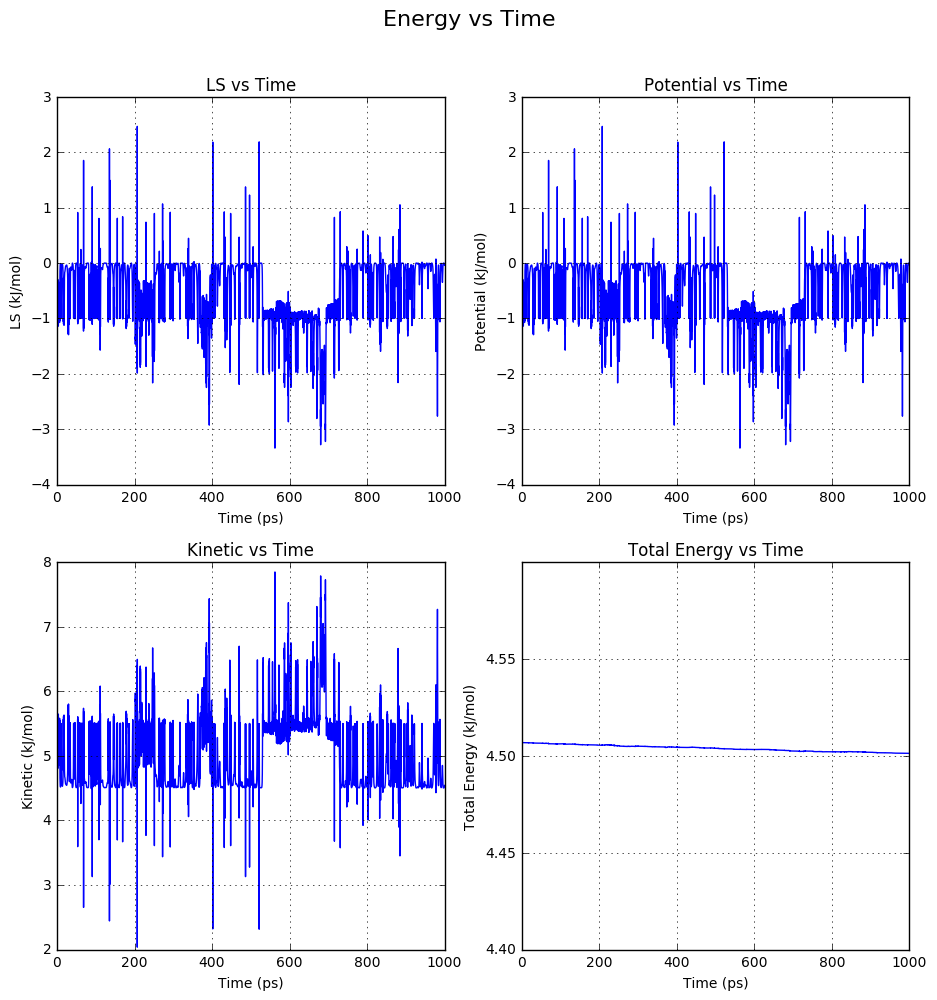

In [4]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(11)
fig.suptitle("Energy vs Time", fontsize=16)

ax1 = fig.add_subplot(221)
ax1.plot(data['Time'],data['LS'])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('LS (kJ/mol)')
ax1.set_title('LS vs Time')
ax1.grid()

ax2 = fig.add_subplot(222)
ax2.plot(data['Time'],data['Potential'])
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Potential (kJ/mol)')
ax2.set_title('Potential vs Time')
ax2.grid()

ax3 = fig.add_subplot(223)
ax3.plot(data['Time'],data['Kinetic'])
ax3.set_xlabel('Time (ps)')
ax3.set_ylabel('Kinetic (kJ/mol)')
ax3.set_title('Kinetic vs Time')
ax3.grid()

ax4 = fig.add_subplot(224)
ax4.plot(data['Time'],data['Total E'])
ax4.set_xlabel('Time (ps)')
ax4.set_ylabel('Total Energy (kJ/mol)')
ax4.set_title('Total Energy vs Time')
ax4.set_ylim([4.4,4.6])
ax4.grid()

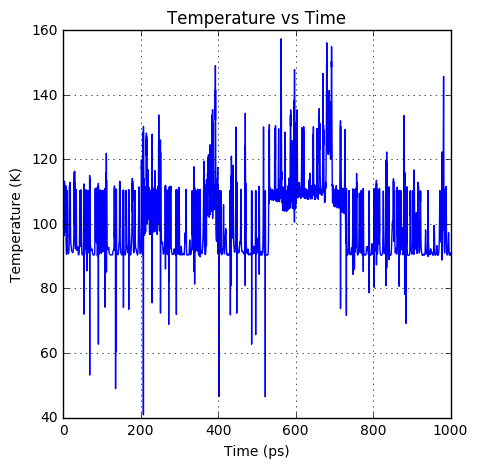

In [5]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(data['Time'],data['Temp'])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Temperature (K)')
ax1.set_title('Temperature vs Time')
ax1.grid()

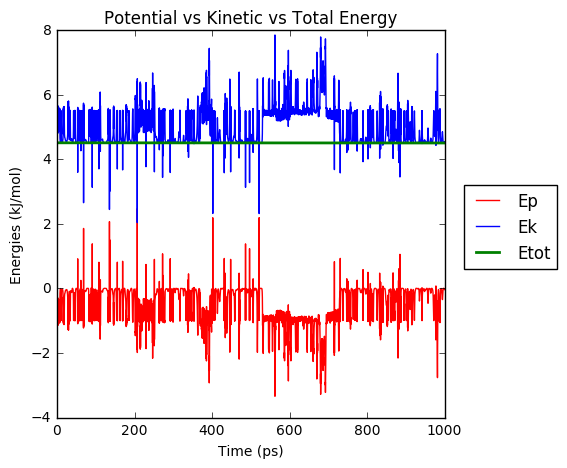

In [6]:
plt.figure(figsize=(5,5))
plt.plot(data['Time'],data['Potential'],'r',label='Ep')
plt.plot(data['Time'],data['Kinetic'],'b',label='Ek')
plt.plot(data['Time'],data['Total E'],'g',label='Etot',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)
plt.xlabel('Time (ps)')
plt.ylabel('Energies (kJ/mol)')
plt.title('Potential vs Kinetic vs Total Energy')


In [7]:
data = pd.read_csv('edrift.csv',names=['dt','Etot_drift'])
data

,dt,Etot_drift
0,0.0001,-5.310410e-03
1,0.0010,-9.676180e-03
2,0.0100,-1.154570e-01
3,0.0200,-2.234430e-01
4,0.0400,-5.099280e-01
5,0.0500,-5.474430e-01
6,0.0800,5.840000e+16


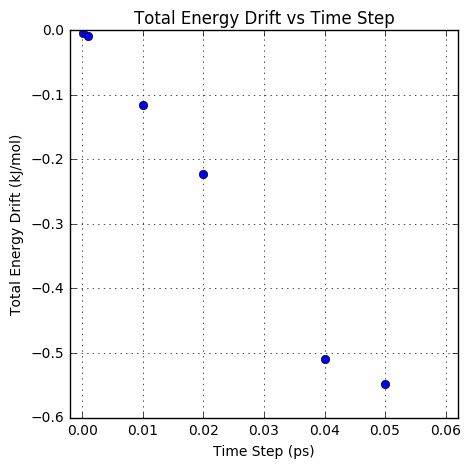

In [8]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(data.dt[0:6],data.Etot_drift[0:6],'o')
ax1.set_xlabel('Time Step (ps)')
ax1.set_ylabel('Total Energy Drift (kJ/mol)')
ax1.set_title('Total Energy Drift vs Time Step')
ax1.set_xlim([-0.002,0.062])
ax1.grid()

From table, we can see that when time step is changed to 0.08 ps, the total energy drift goes to 5.84e+16. When dt=0.1 is set, computers can't run the simulation anymore, because the total energy goes too large. 

## Who makes system crash?
As we discussed in class last Friday, there are probably two things:
* Time Step: It can be saw from the result above. When time step increases, the total energy drift goes more negative value and then system crashes. The reason is that this simulation is based on numerical integration. As we learned from math class last quarter, when we do Euler method, we have to choose enough small h to get an accurate approximation, or error will accumulate. That h is exactly the time step here, so we will get more inaccurate energy values when we choose larger time steps.
* Large temperature: Recalled we learned from math class, a stiff system means differences between parameters in a equation set are very large. To do numeric method on this kind of system, very small h must be choosed, or approximation will go infinity. Temperature here will affect parameters in the equation set. If we choose a very large temperature and make time step unchange, the system will crash. Thus we have to choose enough small time step to do  simulation on larger temperature, but it will be more time-consuming.